### Challenge Link:
### https://datahack.analyticsvidhya.com/contest/machine-learning-starter-program-hackathon/#ProblemStatement

### Problem Statement:
### You are given a dataset of trainee performance for the training curriculum test wise within multiple programs. Your task is to predict the performance on such tests given the demographic information and training program/test details. This will enable your client to strengthen its training problem by figuring out the most important factors that lead to a better engagement and performance for a trainee. The evaluation metric for this competition is AUC ROC score.

In [1]:
# load basic libraries
import pandas as pd
import numpy as np

c:\users\prateek.g\appdata\local\continuum\anaconda3\envs\mynewenv\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\prateek.g\appdata\local\continuum\anaconda3\envs\mynewenv\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\users\prateek.g\appdata\local\continuum\anaconda3\envs\mynewenv\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
# load the training/testing/submission files
train = pd.read_csv('train_HK6lq50.csv')
test = pd.read_csv('test_wF0Ps6O.csv')
sub = pd.read_csv('sample_submission_vaSxamm.csv')

In [3]:
print("training data shape:", train.shape)
print("testing data shape:", test.shape)

training data shape: (73147, 16)
testing data shape: (31349, 15)


In [4]:
# check the data types of the training dataset
train.dtypes

id                            object
program_id                    object
program_type                  object
program_duration               int64
test_id                        int64
test_type                     object
difficulty_level              object
trainee_id                     int64
gender                        object
education                     object
city_tier                      int64
age                          float64
total_programs_enrolled        int64
is_handicapped                object
trainee_engagement_rating    float64
is_pass                        int64
dtype: object

In [5]:
# check the head of the data
train.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1


In [6]:
# check statistical summary
train.describe()

,program_duration,test_id,trainee_id,city_tier,age,total_programs_enrolled,trainee_engagement_rating,is_pass
count,73147.000000,73147.000000,73147.000000,73147.000000,45418.000000,73147.000000,73070.000000,73147.000000
mean,128.208676,91.079306,9843.079620,2.246845,36.494033,2.583934,2.395634,0.695408
std,6.889679,51.239048,5703.556093,1.011587,9.041119,1.240816,1.325288,0.460238
min,117.000000,0.000000,1.000000,1.000000,17.000000,1.000000,1.000000,0.000000
25%,121.000000,45.000000,5040.000000,1.000000,28.000000,2.000000,1.000000,0.000000
50%,131.000000,90.000000,9641.000000,2.000000,39.000000,2.000000,2.000000,1.000000
75%,134.000000,135.000000,14552.000000,3.000000,45.000000,3.000000,4.000000,1.000000
max,136.000000,187.000000,20098.000000,4.000000,63.000000,14.000000,5.000000,1.000000


In [7]:
# check any missing data
train.isnull().sum()

id                               0
program_id                       0
program_type                     0
program_duration                 0
test_id                          0
test_type                        0
difficulty_level                 0
trainee_id                       0
gender                           0
education                        0
city_tier                        0
age                          27729
total_programs_enrolled          0
is_handicapped                   0
trainee_engagement_rating       77
is_pass                          0
dtype: int64

In [8]:
test.isnull().sum()

id                               0
program_id                       0
program_type                     0
program_duration                 0
test_id                          0
test_type                        0
difficulty_level                 0
trainee_id                       0
gender                           0
education                        0
city_tier                        0
age                          11791
total_programs_enrolled          0
is_handicapped                   0
trainee_engagement_rating       31
dtype: int64

In [9]:
# check unique values of rating
train.trainee_engagement_rating.unique()

array([ 1.,  3.,  2.,  4.,  5., nan])

In [10]:
# check unique values of age
train.age.unique()

array([24., 26., 40., nan, 42., 29., 48., 45., 28., 43., 27., 32., 44.,
       41., 23., 38., 30., 46., 25., 31., 34., 56., 47., 33., 22., 59.,
       49., 21., 18., 35., 36., 50., 55., 39., 51., 20., 19., 54., 58.,
       57., 37., 52., 53., 17., 63., 60.])

In [11]:
# filling missing values in both datasets
age_median = train.loc[:,"age"].median()
train['age'] = train['age'].fillna(age_median)
rating_median = train.loc[:,"trainee_engagement_rating"].median()
train['trainee_engagement_rating'] = train['trainee_engagement_rating'].fillna(rating_median)

age1_median = test.loc[:,"age"].median()
test['age'] = test['age'].fillna(age1_median)
rating1_median = test.loc[:,"trainee_engagement_rating"].median()
test['trainee_engagement_rating'] = test['trainee_engagement_rating'].fillna(rating1_median)

In [12]:
# recheck if there any missing value
train.isnull().sum()

id                           0
program_id                   0
program_type                 0
program_duration             0
test_id                      0
test_type                    0
difficulty_level             0
trainee_id                   0
gender                       0
education                    0
city_tier                    0
age                          0
total_programs_enrolled      0
is_handicapped               0
trainee_engagement_rating    0
is_pass                      0
dtype: int64

In [13]:
test.isnull().sum()

id                           0
program_id                   0
program_type                 0
program_duration             0
test_id                      0
test_type                    0
difficulty_level             0
trainee_id                   0
gender                       0
education                    0
city_tier                    0
age                          0
total_programs_enrolled      0
is_handicapped               0
trainee_engagement_rating    0
dtype: int64

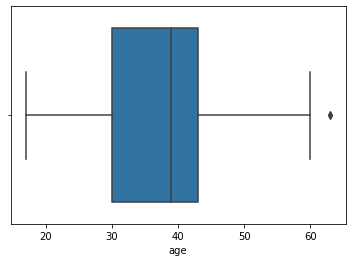

In [14]:
# check outliars in age column
import seaborn as sns
sns.boxplot(x=train['age'])

In [15]:
# replace outliar from age column
train['age'] = train['age'].replace(train['age'].max(),train['age'].median())
test['age'] = test['age'].replace(test['age'].max(),test['age'].median())

In [16]:
# feature extraction- creating new columns from days
import datetime
from dateutil.relativedelta import relativedelta
y=[]
m=[]
d=[]
for i,row in train.iterrows():
    now = datetime.datetime.now()
    td = datetime.timedelta(days=row['program_duration'])
    five_hundred_days_ago = now - td
    rl = relativedelta(now, five_hundred_days_ago)
    y.append(rl.years)
    m.append(rl.months)
    d.append(rl.days)
train['year']=y
train['month']=m
train['day']=d
#print(train.head())

y1=[]
m1=[]
d1=[]
for i,row in test.iterrows():
    now = datetime.datetime.now()
    td = datetime.timedelta(days=row['program_duration'])
    five_hundred_days_ago = now - td
    rl = relativedelta(now, five_hundred_days_ago)
    y1.append(rl.years)
    m1.append(rl.months)
    d1.append(rl.days)
test['year']=y1
test['month']=m1
test['day']=d1

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73147 entries, 0 to 73146
Data columns (total 19 columns):
id                           73147 non-null object
program_id                   73147 non-null object
program_type                 73147 non-null object
program_duration             73147 non-null int64
test_id                      73147 non-null int64
test_type                    73147 non-null object
difficulty_level             73147 non-null object
trainee_id                   73147 non-null int64
gender                       73147 non-null object
education                    73147 non-null object
city_tier                    73147 non-null int64
age                          73147 non-null float64
total_programs_enrolled      73147 non-null int64
is_handicapped               73147 non-null object
trainee_engagement_rating    73147 non-null float64
is_pass                      73147 non-null int64
year                         73147 non-null int64
month                        

In [18]:
# seperate the features and target column
X = train.drop('is_pass', axis=1)
y = train.is_pass

In [19]:
X.columns

Index(['id', 'program_id', 'program_type', 'program_duration', 'test_id',
       'test_type', 'difficulty_level', 'trainee_id', 'gender', 'education',
       'city_tier', 'age', 'total_programs_enrolled', 'is_handicapped',
       'trainee_engagement_rating', 'year', 'month', 'day'],
      dtype='object')

In [20]:
# specify the categorical columns list
categorical_features_indices = np.where(X.dtypes != np.float)[0]

In [21]:
# split the training dataset into train and validation datasets
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.85, random_state=42)

X_test = test

In [22]:
# import catboost library
from catboost import CatBoostClassifier, Pool, cv

In [23]:
# initialize the catboost with required parameters
model = CatBoostClassifier(
    eval_metric='AUC',
    random_seed=42,
    use_best_model=True,
    verbose=1  
)

In [24]:
# train the model
model.fit(
    X_train, y_train,
    cat_features=categorical_features_indices,
    eval_set=(X_validation, y_validation),
#     logging_level='Verbose',  uncomment this for text output
    plot=False
);

Learning rate set to 0.120387
0:	test: 0.7015904	best: 0.7015904 (0)	total: 186ms	remaining: 3m 5s
1:	test: 0.7104489	best: 0.7104489 (1)	total: 267ms	remaining: 2m 13s
2:	test: 0.7677628	best: 0.7677628 (2)	total: 361ms	remaining: 2m
3:	test: 0.7926415	best: 0.7926415 (3)	total: 427ms	remaining: 1m 46s
4:	test: 0.7988635	best: 0.7988635 (4)	total: 542ms	remaining: 1m 47s
5:	test: 0.8021891	best: 0.8021891 (5)	total: 655ms	remaining: 1m 48s
6:	test: 0.8048788	best: 0.8048788 (6)	total: 721ms	remaining: 1m 42s
7:	test: 0.8062575	best: 0.8062575 (7)	total: 764ms	remaining: 1m 34s
8:	test: 0.8064788	best: 0.8064788 (8)	total: 870ms	remaining: 1m 35s
9:	test: 0.8084958	best: 0.8084958 (9)	total: 966ms	remaining: 1m 35s
10:	test: 0.8095965	best: 0.8095965 (10)	total: 1.07s	remaining: 1m 35s
11:	test: 0.8103155	best: 0.8103155 (11)	total: 1.16s	remaining: 1m 35s
12:	test: 0.8111851	best: 0.8111851 (12)	total: 1.25s	remaining: 1m 34s
13:	test: 0.8126639	best: 0.8126639 (13)	total: 1.35s	remai

114:	test: 0.8298861	best: 0.8298861 (114)	total: 11.9s	remaining: 1m 31s
115:	test: 0.8299032	best: 0.8299032 (115)	total: 12s	remaining: 1m 31s
116:	test: 0.8299371	best: 0.8299371 (116)	total: 12.1s	remaining: 1m 31s
117:	test: 0.8300282	best: 0.8300282 (117)	total: 12.2s	remaining: 1m 31s
118:	test: 0.8300112	best: 0.8300282 (117)	total: 12.3s	remaining: 1m 31s
119:	test: 0.8300992	best: 0.8300992 (119)	total: 12.4s	remaining: 1m 30s
120:	test: 0.8300911	best: 0.8300992 (119)	total: 12.5s	remaining: 1m 30s
121:	test: 0.8300972	best: 0.8300992 (119)	total: 12.6s	remaining: 1m 30s
122:	test: 0.8301019	best: 0.8301019 (122)	total: 12.7s	remaining: 1m 30s
123:	test: 0.8301427	best: 0.8301427 (123)	total: 12.8s	remaining: 1m 30s
124:	test: 0.8302538	best: 0.8302538 (124)	total: 12.8s	remaining: 1m 29s
125:	test: 0.8302725	best: 0.8302725 (125)	total: 12.9s	remaining: 1m 29s
126:	test: 0.8302821	best: 0.8302821 (126)	total: 13s	remaining: 1m 29s
127:	test: 0.8304884	best: 0.8304884 (127)

226:	test: 0.8316646	best: 0.8316704 (223)	total: 23s	remaining: 1m 18s
227:	test: 0.8316996	best: 0.8316996 (227)	total: 23.1s	remaining: 1m 18s
228:	test: 0.8317545	best: 0.8317545 (228)	total: 23.2s	remaining: 1m 18s
229:	test: 0.8317263	best: 0.8317545 (228)	total: 23.3s	remaining: 1m 17s
230:	test: 0.8317487	best: 0.8317545 (228)	total: 23.4s	remaining: 1m 17s
231:	test: 0.8317363	best: 0.8317545 (228)	total: 23.5s	remaining: 1m 17s
232:	test: 0.8317028	best: 0.8317545 (228)	total: 23.6s	remaining: 1m 17s
233:	test: 0.8317199	best: 0.8317545 (228)	total: 23.7s	remaining: 1m 17s
234:	test: 0.8317242	best: 0.8317545 (228)	total: 23.7s	remaining: 1m 17s
235:	test: 0.8317348	best: 0.8317545 (228)	total: 23.9s	remaining: 1m 17s
236:	test: 0.8317987	best: 0.8317987 (236)	total: 24s	remaining: 1m 17s
237:	test: 0.8317685	best: 0.8317987 (236)	total: 24.1s	remaining: 1m 17s
238:	test: 0.8317666	best: 0.8317987 (236)	total: 24.2s	remaining: 1m 17s
239:	test: 0.8317810	best: 0.8317987 (236)

339:	test: 0.8322295	best: 0.8322304 (338)	total: 35.1s	remaining: 1m 8s
340:	test: 0.8322319	best: 0.8322319 (340)	total: 35.2s	remaining: 1m 8s
341:	test: 0.8322604	best: 0.8322604 (341)	total: 35.3s	remaining: 1m 7s
342:	test: 0.8322731	best: 0.8322731 (342)	total: 35.4s	remaining: 1m 7s
343:	test: 0.8322627	best: 0.8322731 (342)	total: 35.4s	remaining: 1m 7s
344:	test: 0.8322340	best: 0.8322731 (342)	total: 35.5s	remaining: 1m 7s
345:	test: 0.8322332	best: 0.8322731 (342)	total: 35.6s	remaining: 1m 7s
346:	test: 0.8322298	best: 0.8322731 (342)	total: 35.7s	remaining: 1m 7s
347:	test: 0.8322582	best: 0.8322731 (342)	total: 35.8s	remaining: 1m 7s
348:	test: 0.8322976	best: 0.8322976 (348)	total: 35.9s	remaining: 1m 6s
349:	test: 0.8323281	best: 0.8323281 (349)	total: 36s	remaining: 1m 6s
350:	test: 0.8323178	best: 0.8323281 (349)	total: 36.1s	remaining: 1m 6s
351:	test: 0.8323222	best: 0.8323281 (349)	total: 36.2s	remaining: 1m 6s
352:	test: 0.8323113	best: 0.8323281 (349)	total: 36.

454:	test: 0.8327248	best: 0.8327791 (446)	total: 46.8s	remaining: 56.1s
455:	test: 0.8327299	best: 0.8327791 (446)	total: 46.9s	remaining: 56s
456:	test: 0.8327336	best: 0.8327791 (446)	total: 47s	remaining: 55.9s
457:	test: 0.8327026	best: 0.8327791 (446)	total: 47.2s	remaining: 55.8s
458:	test: 0.8327078	best: 0.8327791 (446)	total: 47.3s	remaining: 55.7s
459:	test: 0.8327004	best: 0.8327791 (446)	total: 47.4s	remaining: 55.6s
460:	test: 0.8326775	best: 0.8327791 (446)	total: 47.5s	remaining: 55.5s
461:	test: 0.8327296	best: 0.8327791 (446)	total: 47.6s	remaining: 55.5s
462:	test: 0.8327638	best: 0.8327791 (446)	total: 47.7s	remaining: 55.4s
463:	test: 0.8327703	best: 0.8327791 (446)	total: 47.8s	remaining: 55.3s
464:	test: 0.8327838	best: 0.8327838 (464)	total: 48s	remaining: 55.2s
465:	test: 0.8327784	best: 0.8327838 (464)	total: 48.1s	remaining: 55.1s
466:	test: 0.8327631	best: 0.8327838 (464)	total: 48.1s	remaining: 54.9s
467:	test: 0.8327558	best: 0.8327838 (464)	total: 48.2s	r

568:	test: 0.8325830	best: 0.8327838 (464)	total: 59.3s	remaining: 44.9s
569:	test: 0.8325981	best: 0.8327838 (464)	total: 59.4s	remaining: 44.8s
570:	test: 0.8325943	best: 0.8327838 (464)	total: 59.5s	remaining: 44.7s
571:	test: 0.8325926	best: 0.8327838 (464)	total: 59.6s	remaining: 44.6s
572:	test: 0.8325687	best: 0.8327838 (464)	total: 59.7s	remaining: 44.5s
573:	test: 0.8325628	best: 0.8327838 (464)	total: 59.8s	remaining: 44.4s
574:	test: 0.8325967	best: 0.8327838 (464)	total: 60s	remaining: 44.3s
575:	test: 0.8326043	best: 0.8327838 (464)	total: 1m	remaining: 44.2s
576:	test: 0.8326310	best: 0.8327838 (464)	total: 1m	remaining: 44.1s
577:	test: 0.8326353	best: 0.8327838 (464)	total: 1m	remaining: 44s
578:	test: 0.8326136	best: 0.8327838 (464)	total: 1m	remaining: 43.9s
579:	test: 0.8326107	best: 0.8327838 (464)	total: 1m	remaining: 43.8s
580:	test: 0.8326091	best: 0.8327838 (464)	total: 1m	remaining: 43.7s
581:	test: 0.8325922	best: 0.8327838 (464)	total: 1m	remaining: 43.6s
582

682:	test: 0.8323538	best: 0.8327838 (464)	total: 1m 9s	remaining: 32.5s
683:	test: 0.8324097	best: 0.8327838 (464)	total: 1m 10s	remaining: 32.4s
684:	test: 0.8323907	best: 0.8327838 (464)	total: 1m 10s	remaining: 32.3s
685:	test: 0.8323800	best: 0.8327838 (464)	total: 1m 10s	remaining: 32.1s
686:	test: 0.8323754	best: 0.8327838 (464)	total: 1m 10s	remaining: 32s
687:	test: 0.8323559	best: 0.8327838 (464)	total: 1m 10s	remaining: 31.9s
688:	test: 0.8323218	best: 0.8327838 (464)	total: 1m 10s	remaining: 31.8s
689:	test: 0.8323136	best: 0.8327838 (464)	total: 1m 10s	remaining: 31.7s
690:	test: 0.8322935	best: 0.8327838 (464)	total: 1m 10s	remaining: 31.6s
691:	test: 0.8322579	best: 0.8327838 (464)	total: 1m 10s	remaining: 31.6s
692:	test: 0.8322573	best: 0.8327838 (464)	total: 1m 10s	remaining: 31.4s
693:	test: 0.8322851	best: 0.8327838 (464)	total: 1m 11s	remaining: 31.3s
694:	test: 0.8322718	best: 0.8327838 (464)	total: 1m 11s	remaining: 31.2s
695:	test: 0.8322694	best: 0.8327838 (464

794:	test: 0.8320413	best: 0.8327838 (464)	total: 1m 21s	remaining: 20.9s
795:	test: 0.8320110	best: 0.8327838 (464)	total: 1m 21s	remaining: 20.8s
796:	test: 0.8319914	best: 0.8327838 (464)	total: 1m 21s	remaining: 20.7s
797:	test: 0.8320047	best: 0.8327838 (464)	total: 1m 21s	remaining: 20.7s
798:	test: 0.8319784	best: 0.8327838 (464)	total: 1m 21s	remaining: 20.6s
799:	test: 0.8319864	best: 0.8327838 (464)	total: 1m 21s	remaining: 20.5s
800:	test: 0.8319876	best: 0.8327838 (464)	total: 1m 21s	remaining: 20.4s
801:	test: 0.8319624	best: 0.8327838 (464)	total: 1m 22s	remaining: 20.3s
802:	test: 0.8319475	best: 0.8327838 (464)	total: 1m 22s	remaining: 20.2s
803:	test: 0.8319460	best: 0.8327838 (464)	total: 1m 22s	remaining: 20.1s
804:	test: 0.8319664	best: 0.8327838 (464)	total: 1m 22s	remaining: 19.9s
805:	test: 0.8319592	best: 0.8327838 (464)	total: 1m 22s	remaining: 19.8s
806:	test: 0.8319554	best: 0.8327838 (464)	total: 1m 22s	remaining: 19.7s
807:	test: 0.8319588	best: 0.8327838 (

907:	test: 0.8317993	best: 0.8327838 (464)	total: 1m 32s	remaining: 9.34s
908:	test: 0.8317785	best: 0.8327838 (464)	total: 1m 32s	remaining: 9.24s
909:	test: 0.8317751	best: 0.8327838 (464)	total: 1m 32s	remaining: 9.14s
910:	test: 0.8317910	best: 0.8327838 (464)	total: 1m 32s	remaining: 9.03s
911:	test: 0.8318161	best: 0.8327838 (464)	total: 1m 32s	remaining: 8.93s
912:	test: 0.8317991	best: 0.8327838 (464)	total: 1m 32s	remaining: 8.83s
913:	test: 0.8317852	best: 0.8327838 (464)	total: 1m 32s	remaining: 8.73s
914:	test: 0.8317147	best: 0.8327838 (464)	total: 1m 32s	remaining: 8.63s
915:	test: 0.8317168	best: 0.8327838 (464)	total: 1m 32s	remaining: 8.52s
916:	test: 0.8317165	best: 0.8327838 (464)	total: 1m 33s	remaining: 8.42s
917:	test: 0.8317243	best: 0.8327838 (464)	total: 1m 33s	remaining: 8.32s
918:	test: 0.8316901	best: 0.8327838 (464)	total: 1m 33s	remaining: 8.21s
919:	test: 0.8316956	best: 0.8327838 (464)	total: 1m 33s	remaining: 8.11s
920:	test: 0.8316757	best: 0.8327838 (

In [25]:
# make prediction on validation dataset
predict = model.predict(X_validation)

In [26]:
# check AUC ROC score
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_validation, predict)
print('ROC AUC %.3f' % score)

ROC AUC 0.726


In [32]:
# perform the 10 fold cross validation on entire dataset
cv_params = model.get_params()
cv_params.update({
    'loss_function': 'Logloss'
})
cv_data = cv(
    Pool(X, y, cat_features=categorical_features_indices),
    cv_params,
    fold_count=15,
    plot=False,
)

0:	test: 0.7019519	best: 0.7019519 (0)	total: 2.3s	remaining: 38m 17s
1:	test: 0.7137394	best: 0.7137394 (1)	total: 3.91s	remaining: 32m 29s
2:	test: 0.7203156	best: 0.7203156 (2)	total: 5.53s	remaining: 30m 38s
3:	test: 0.7292095	best: 0.7292095 (3)	total: 7.26s	remaining: 30m 7s
4:	test: 0.7440070	best: 0.7440070 (4)	total: 9.11s	remaining: 30m 13s
5:	test: 0.7649355	best: 0.7649355 (5)	total: 10.8s	remaining: 29m 49s
6:	test: 0.7794872	best: 0.7794872 (6)	total: 12.5s	remaining: 29m 34s
7:	test: 0.7881051	best: 0.7881051 (7)	total: 13.9s	remaining: 28m 46s
8:	test: 0.7939753	best: 0.7939753 (8)	total: 15.4s	remaining: 28m 19s
9:	test: 0.7974767	best: 0.7974767 (9)	total: 17.1s	remaining: 28m 10s
10:	test: 0.7997900	best: 0.7997900 (10)	total: 18.5s	remaining: 27m 46s
11:	test: 0.8013019	best: 0.8013019 (11)	total: 20s	remaining: 27m 26s
12:	test: 0.8026613	best: 0.8026613 (12)	total: 21.6s	remaining: 27m 21s
13:	test: 0.8035851	best: 0.8035851 (13)	total: 23.4s	remaining: 27m 26s
14

112:	test: 0.8233749	best: 0.8233749 (112)	total: 3m 40s	remaining: 28m 50s
113:	test: 0.8234626	best: 0.8234626 (113)	total: 3m 42s	remaining: 28m 52s
114:	test: 0.8235307	best: 0.8235307 (114)	total: 3m 45s	remaining: 28m 53s
115:	test: 0.8235989	best: 0.8235989 (115)	total: 3m 47s	remaining: 28m 53s
116:	test: 0.8236741	best: 0.8236741 (116)	total: 3m 49s	remaining: 28m 52s
117:	test: 0.8237565	best: 0.8237565 (117)	total: 3m 51s	remaining: 28m 53s
118:	test: 0.8238226	best: 0.8238226 (118)	total: 3m 54s	remaining: 28m 53s
119:	test: 0.8238757	best: 0.8238757 (119)	total: 3m 56s	remaining: 28m 52s
120:	test: 0.8239538	best: 0.8239538 (120)	total: 3m 58s	remaining: 28m 51s
121:	test: 0.8240251	best: 0.8240251 (121)	total: 4m	remaining: 28m 51s
122:	test: 0.8241008	best: 0.8241008 (122)	total: 4m 2s	remaining: 28m 50s
123:	test: 0.8241550	best: 0.8241550 (123)	total: 4m 4s	remaining: 28m 49s
124:	test: 0.8242303	best: 0.8242303 (124)	total: 4m 7s	remaining: 28m 49s
125:	test: 0.824294

221:	test: 0.8284545	best: 0.8284545 (221)	total: 7m 52s	remaining: 27m 37s
222:	test: 0.8284925	best: 0.8284925 (222)	total: 7m 55s	remaining: 27m 36s
223:	test: 0.8285195	best: 0.8285195 (223)	total: 7m 57s	remaining: 27m 35s
224:	test: 0.8285482	best: 0.8285482 (224)	total: 8m	remaining: 27m 34s
225:	test: 0.8285705	best: 0.8285705 (225)	total: 8m 2s	remaining: 27m 33s
226:	test: 0.8286070	best: 0.8286070 (226)	total: 8m 5s	remaining: 27m 32s
227:	test: 0.8286333	best: 0.8286333 (227)	total: 8m 7s	remaining: 27m 31s
228:	test: 0.8286713	best: 0.8286713 (228)	total: 8m 10s	remaining: 27m 30s
229:	test: 0.8286974	best: 0.8286974 (229)	total: 8m 12s	remaining: 27m 29s
230:	test: 0.8287392	best: 0.8287392 (230)	total: 8m 15s	remaining: 27m 28s
231:	test: 0.8287627	best: 0.8287627 (231)	total: 8m 17s	remaining: 27m 26s
232:	test: 0.8287893	best: 0.8287893 (232)	total: 8m 19s	remaining: 27m 25s
233:	test: 0.8288245	best: 0.8288245 (233)	total: 8m 22s	remaining: 27m 24s
234:	test: 0.828848

329:	test: 0.8308638	best: 0.8308638 (329)	total: 12m 22s	remaining: 25m 8s
330:	test: 0.8308849	best: 0.8308849 (330)	total: 12m 25s	remaining: 25m 6s
331:	test: 0.8309215	best: 0.8309215 (331)	total: 12m 28s	remaining: 25m 6s
332:	test: 0.8309371	best: 0.8309371 (332)	total: 12m 31s	remaining: 25m 4s
333:	test: 0.8309473	best: 0.8309473 (333)	total: 12m 33s	remaining: 25m 3s
334:	test: 0.8309695	best: 0.8309695 (334)	total: 12m 36s	remaining: 25m 2s
335:	test: 0.8309813	best: 0.8309813 (335)	total: 12m 39s	remaining: 25m 1s
336:	test: 0.8309978	best: 0.8309978 (336)	total: 12m 43s	remaining: 25m 2s
337:	test: 0.8310134	best: 0.8310134 (337)	total: 12m 46s	remaining: 25m 2s
338:	test: 0.8310181	best: 0.8310181 (338)	total: 12m 49s	remaining: 25m
339:	test: 0.8310329	best: 0.8310329 (339)	total: 12m 52s	remaining: 24m 59s
340:	test: 0.8310477	best: 0.8310477 (340)	total: 12m 54s	remaining: 24m 57s
341:	test: 0.8310584	best: 0.8310584 (341)	total: 12m 57s	remaining: 24m 56s
342:	test: 0

437:	test: 0.8324794	best: 0.8324794 (437)	total: 17m 27s	remaining: 22m 23s
438:	test: 0.8324839	best: 0.8324839 (438)	total: 17m 30s	remaining: 22m 22s
439:	test: 0.8325057	best: 0.8325057 (439)	total: 17m 33s	remaining: 22m 20s
440:	test: 0.8325081	best: 0.8325081 (440)	total: 17m 36s	remaining: 22m 18s
441:	test: 0.8325275	best: 0.8325275 (441)	total: 17m 38s	remaining: 22m 16s
442:	test: 0.8325528	best: 0.8325528 (442)	total: 17m 41s	remaining: 22m 15s
443:	test: 0.8325636	best: 0.8325636 (443)	total: 17m 44s	remaining: 22m 13s
444:	test: 0.8325732	best: 0.8325732 (444)	total: 17m 48s	remaining: 22m 12s
445:	test: 0.8325866	best: 0.8325866 (445)	total: 17m 51s	remaining: 22m 10s
446:	test: 0.8325981	best: 0.8325981 (446)	total: 17m 54s	remaining: 22m 9s
447:	test: 0.8326076	best: 0.8326076 (447)	total: 17m 58s	remaining: 22m 8s
448:	test: 0.8326207	best: 0.8326207 (448)	total: 18m 1s	remaining: 22m 6s
449:	test: 0.8326330	best: 0.8326330 (449)	total: 18m 4s	remaining: 22m 5s
450:	

545:	test: 0.8334462	best: 0.8334462 (545)	total: 23m 14s	remaining: 19m 19s
546:	test: 0.8334532	best: 0.8334532 (546)	total: 23m 17s	remaining: 19m 17s
547:	test: 0.8334613	best: 0.8334613 (547)	total: 23m 20s	remaining: 19m 15s
548:	test: 0.8334697	best: 0.8334697 (548)	total: 23m 23s	remaining: 19m 13s
549:	test: 0.8334741	best: 0.8334741 (549)	total: 23m 26s	remaining: 19m 11s
550:	test: 0.8334753	best: 0.8334753 (550)	total: 23m 30s	remaining: 19m 9s
551:	test: 0.8334794	best: 0.8334794 (551)	total: 23m 33s	remaining: 19m 6s
552:	test: 0.8334869	best: 0.8334869 (552)	total: 23m 36s	remaining: 19m 4s
553:	test: 0.8334897	best: 0.8334897 (553)	total: 23m 39s	remaining: 19m 2s
554:	test: 0.8334988	best: 0.8334988 (554)	total: 23m 42s	remaining: 19m
555:	test: 0.8335017	best: 0.8335017 (555)	total: 23m 45s	remaining: 18m 58s
556:	test: 0.8335087	best: 0.8335087 (556)	total: 23m 48s	remaining: 18m 56s
557:	test: 0.8335178	best: 0.8335178 (557)	total: 23m 51s	remaining: 18m 54s
558:	te

652:	test: 0.8340696	best: 0.8340696 (652)	total: 28m 53s	remaining: 15m 21s
653:	test: 0.8340747	best: 0.8340747 (653)	total: 28m 56s	remaining: 15m 18s
654:	test: 0.8340809	best: 0.8340809 (654)	total: 29m	remaining: 15m 16s
655:	test: 0.8340800	best: 0.8340809 (654)	total: 29m 3s	remaining: 15m 14s
656:	test: 0.8340857	best: 0.8340857 (656)	total: 29m 6s	remaining: 15m 11s
657:	test: 0.8340919	best: 0.8340919 (657)	total: 29m 9s	remaining: 15m 9s
658:	test: 0.8340981	best: 0.8340981 (658)	total: 29m 12s	remaining: 15m 7s
659:	test: 0.8341000	best: 0.8341000 (659)	total: 29m 15s	remaining: 15m 4s
660:	test: 0.8341009	best: 0.8341009 (660)	total: 29m 19s	remaining: 15m 2s
661:	test: 0.8341064	best: 0.8341064 (661)	total: 29m 22s	remaining: 14m 59s
662:	test: 0.8341086	best: 0.8341086 (662)	total: 29m 25s	remaining: 14m 57s
663:	test: 0.8341082	best: 0.8341086 (662)	total: 29m 28s	remaining: 14m 55s
664:	test: 0.8341145	best: 0.8341145 (664)	total: 29m 32s	remaining: 14m 52s
665:	test:

760:	test: 0.8344837	best: 0.8344837 (760)	total: 34m 44s	remaining: 10m 54s
761:	test: 0.8344897	best: 0.8344897 (761)	total: 34m 48s	remaining: 10m 52s
762:	test: 0.8344906	best: 0.8344906 (762)	total: 34m 51s	remaining: 10m 49s
763:	test: 0.8344901	best: 0.8344906 (762)	total: 34m 54s	remaining: 10m 47s
764:	test: 0.8344964	best: 0.8344964 (764)	total: 34m 58s	remaining: 10m 44s
765:	test: 0.8344982	best: 0.8344982 (765)	total: 35m 1s	remaining: 10m 41s
766:	test: 0.8345032	best: 0.8345032 (766)	total: 35m 4s	remaining: 10m 39s
767:	test: 0.8345113	best: 0.8345113 (767)	total: 35m 8s	remaining: 10m 36s
768:	test: 0.8345134	best: 0.8345134 (768)	total: 35m 11s	remaining: 10m 34s
769:	test: 0.8345142	best: 0.8345142 (769)	total: 35m 14s	remaining: 10m 31s
770:	test: 0.8345197	best: 0.8345197 (770)	total: 35m 18s	remaining: 10m 29s
771:	test: 0.8345249	best: 0.8345249 (771)	total: 35m 21s	remaining: 10m 26s
772:	test: 0.8345267	best: 0.8345267 (772)	total: 35m 24s	remaining: 10m 24s
77

869:	test: 0.8348312	best: 0.8348312 (869)	total: 40m 49s	remaining: 6m 6s
870:	test: 0.8348328	best: 0.8348328 (870)	total: 40m 52s	remaining: 6m 3s
871:	test: 0.8348323	best: 0.8348328 (870)	total: 40m 56s	remaining: 6m
872:	test: 0.8348369	best: 0.8348369 (872)	total: 41m	remaining: 5m 57s
873:	test: 0.8348422	best: 0.8348422 (873)	total: 41m 3s	remaining: 5m 55s
874:	test: 0.8348416	best: 0.8348422 (873)	total: 41m 6s	remaining: 5m 52s
875:	test: 0.8348420	best: 0.8348422 (873)	total: 41m 9s	remaining: 5m 49s
876:	test: 0.8348443	best: 0.8348443 (876)	total: 41m 12s	remaining: 5m 46s
877:	test: 0.8348474	best: 0.8348474 (877)	total: 41m 16s	remaining: 5m 44s
878:	test: 0.8348507	best: 0.8348507 (878)	total: 41m 19s	remaining: 5m 41s
879:	test: 0.8348554	best: 0.8348554 (879)	total: 41m 22s	remaining: 5m 38s
880:	test: 0.8348567	best: 0.8348567 (880)	total: 41m 25s	remaining: 5m 35s
881:	test: 0.8348582	best: 0.8348582 (881)	total: 41m 29s	remaining: 5m 33s
882:	test: 0.8348567	best

978:	test: 0.8350980	best: 0.8350980 (978)	total: 46m 49s	remaining: 1m
979:	test: 0.8350976	best: 0.8350980 (978)	total: 46m 52s	remaining: 57.4s
980:	test: 0.8350943	best: 0.8350980 (978)	total: 46m 56s	remaining: 54.5s
981:	test: 0.8350978	best: 0.8350980 (978)	total: 46m 59s	remaining: 51.7s
982:	test: 0.8351007	best: 0.8351007 (982)	total: 47m 2s	remaining: 48.8s
983:	test: 0.8351100	best: 0.8351100 (983)	total: 47m 6s	remaining: 46s
984:	test: 0.8351118	best: 0.8351118 (984)	total: 47m 9s	remaining: 43.1s
985:	test: 0.8351102	best: 0.8351118 (984)	total: 47m 13s	remaining: 40.2s
986:	test: 0.8351116	best: 0.8351118 (984)	total: 47m 16s	remaining: 37.4s
987:	test: 0.8351143	best: 0.8351143 (987)	total: 47m 19s	remaining: 34.5s
988:	test: 0.8351180	best: 0.8351180 (988)	total: 47m 23s	remaining: 31.6s
989:	test: 0.8351224	best: 0.8351224 (989)	total: 47m 27s	remaining: 28.8s
990:	test: 0.8351243	best: 0.8351243 (990)	total: 47m 30s	remaining: 25.9s
991:	test: 0.8351255	best: 0.8351

In [33]:
#print(cv_data)
print(np.max(cv_data['test-AUC-mean']))

0.8351449833987624


In [34]:
# check the important features
train_pool = Pool(X_train, y_train, cat_features=categorical_features_indices)
feature_importances = model.get_feature_importance(train_pool)
feature_names = X_train.columns
for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
    print('{}: {}'.format(name, score))

trainee_id: 33.23337300849123
test_id: 16.33384536477576
trainee_engagement_rating: 10.394012025422727
difficulty_level: 8.82825056824216
program_type: 8.545653092301025
program_id: 3.6814476270165413
city_tier: 3.671551220081905
education: 3.6480126398168276
age: 2.9593704319759806
day: 2.789146361896367
total_programs_enrolled: 2.161020631739404
program_duration: 1.2441551536828435
is_handicapped: 0.9388190833152165
gender: 0.909848847980196
month: 0.4046989804536574
test_type: 0.25679496280812303
year: 0.0
id: 0.0


In [63]:
# install the catboost parameter tuning library
!pip install hyperopt

  Running setup.py bdist_wheel for networkx: started
  Running setup.py bdist_wheel for networkx: finished with status 'done'
  Stored in directory: C:\Users\prateek.g\AppData\Local\pip\Cache\wheels\68\f8\29\b53346a112a07d30a5a84d53f19aeadaa1a474897c0423af91
Successfully built networkx
  Found existing installation: networkx 2.4
    Uninstalling networkx-2.4:
      Successfully uninstalled networkx-2.4


imgaug 0.3.0 requires opencv-python-headless, which is not installed.


In [72]:
# define the best hyperparamater finding library
import hyperopt

def hyperopt_objective(params):
    model = CatBoostClassifier(
        l2_leaf_reg=int(params['l2_leaf_reg']),
        learning_rate=params['learning_rate'],
        iterations=500,
        eval_metric='AUC',
        random_seed=42,
        verbose=False,
        loss_function='Logloss',
    )
    
    cv_data = cv(
        Pool(X, y, cat_features=categorical_features_indices),
        model.get_params()
    )
    best_accuracy = np.max(cv_data['test-AUC-mean'])
    
    return 1 - best_accuracy # as hyperopt minimises

In [73]:
# # uncomment if you want to find best hyperparameters
# from numpy.random import RandomState

# params_space = {
#     'l2_leaf_reg': hyperopt.hp.qloguniform('l2_leaf_reg', 0, 2, 1),
#     'learning_rate': hyperopt.hp.uniform('learning_rate', 1e-3, 5e-1),
# }

# trials = hyperopt.Trials()

# best = hyperopt.fmin(
#     hyperopt_objective,
#     space=params_space,
#     algo=hyperopt.tpe.suggest,
#     max_evals=50,
#     trials=trials,
#     rstate=RandomState(123)
# )

# print(best)

100%|████████████████████████████████████████████| 50/50 [2:17:55<00:00, 165.51s/trial, best loss: 0.18088931308270106]
{'l2_leaf_reg': 5.0, 'learning_rate': 0.1147638000846512}


In [ ]:
# found best parameters from above code : {'l2_leaf_reg': 5.0, 'learning_rate': 0.1147638000846512}

In [152]:
# tuned_model = CatBoostClassifier(
#     l2_leaf_reg=int(best['l2_leaf_reg']),
#     learning_rate=best['learning_rate'],
#     iterations=500,
#     eval_metric='AUC',
#     random_seed=42,
#     verbose=False,
#     loss_function='Logloss',
#     use_best_model=True
# )
# cv_data = cv(Pool(X, y, cat_features=categorical_features_indices), tuned_model.get_params())

KeyboardInterrupt: 

In [75]:
cv_data

,iterations,test-AUC-mean,test-AUC-std,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std
0,0,0.698797,0.005838,0.662051,0.000306,0.662022,0.000168
1,1,0.715196,0.009424,0.637465,0.000595,0.637845,0.001436
2,2,0.717701,0.007339,0.618605,0.001250,0.619613,0.000141
3,3,0.746173,0.016680,0.595754,0.005540,0.600147,0.004711
4,4,0.769097,0.005015,0.574651,0.004881,0.582949,0.004566
...,...,...,...,...,...,...,...
495,495,0.819083,0.003962,0.466807,0.003924,0.464295,0.001561
496,496,0.819098,0.003943,0.466794,0.003908,0.464217,0.001608
497,497,0.819098,0.003938,0.466793,0.003907,0.464192,0.001594
498,498,0.819107,0.003929,0.466774,0.003890,0.464116,0.001574


In [76]:
print('Precise validation accuracy score: {}'.format(np.max(cv_data['test-AUC-mean'])))

Precise validation accuracy score: 0.8191106869172989


In [27]:
# initialize the catboost with best parameters we found above
best_model = CatBoostClassifier(
    l2_leaf_reg=int(5.0),
    learning_rate=0.1147638000846512,
    iterations=500,
    eval_metric='AUC',
    random_seed=42,
    verbose=False,
    loss_function='Logloss',
    use_best_model=False
)

In [28]:
# train the best model
best_model.fit(X, y, cat_features=categorical_features_indices)

In [29]:
# make prediction and submission file for this challenge
#predictions = best_model.predict(X_test)
predictions = best_model.predict_proba(X_test)[:,1]
print(predictions[:10])
submission = pd.DataFrame({ 'id': test.id, 'is_pass': predictions })
submission.to_csv('Submission_best_prob.csv', index=False)

[0.34010936 0.98592996 0.40808792 0.00720815 0.38084491 0.58898622
 0.97148781 0.80478625 0.90436937 0.94173255]


submission with predict_proba() is giving best score in lb=0.83539183
It seemsfor this problem predict_proba() is better than predict().

In [30]:
# save and load model
best_model.save_model('catboost_best_model.dump')
model2 = CatBoostClassifier()
model2.load_model('catboost_best_model.dump');

In [31]:
# create another best model with different random seed value
best_model2 = CatBoostClassifier(
    l2_leaf_reg=int(5.0),
    learning_rate=0.1147638000846512,
    iterations=500,
    eval_metric='AUC',
    random_seed=3,
    verbose=False,
    loss_function='Logloss',
    use_best_model=False
)

In [32]:
best_model2.fit(X, y, cat_features=categorical_features_indices)

In [33]:
# predictions2 = best_model2.predict(X_test)
predictions2 = best_model2.predict_proba(X_test)[:,1]

In [34]:
# create another best model with different random seed value
best_model3 = CatBoostClassifier(
    l2_leaf_reg=int(5.0),
    learning_rate=0.1147638000846512,
    iterations=500,
    eval_metric='AUC',
    random_seed=12,
    verbose=False,
    loss_function='Logloss',
    use_best_model=False
)

In [35]:
best_model3.fit(X, y, cat_features=categorical_features_indices)

In [36]:
# predictions3 = best_model3.predict(X_test)
predictions3 = best_model3.predict_proba(X_test)[:,1]

In [46]:
# create the final prediction
final_prediction = (predictions+predictions2+predictions3)/3

In [47]:
# make the final submisison with best score
print(final_prediction[:10])
submission = pd.DataFrame({ 'id': test.id, 'is_pass': final_prediction })
submission.to_csv('Submission_cat_prob_avg_updated.csv', index=False)

[0.30445392 0.98321133 0.42191683 0.01124901 0.40664115 0.5638978
 0.96680377 0.81737361 0.89208752 0.93789964]


Average of 3 predict_proba() models gives me score in lb= 0.83647755086